In [2]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [3]:
# Load the Injury_and_Fatality dataset
file_path = 'Injury_and_Fatality.csv' 
injury_and_fatality = pd.read_csv(file_path)

# Data Cleaning

# Convert CRASH DATE to datetime
injury_and_fatality['CRASH DATE'] = pd.to_datetime(injury_and_fatality['CRASH DATE'], errors='coerce')

# Fill NaN values in injury and fatality columns with 0
injury_and_fatality['NUMBER OF PERSONS INJURED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF PERSONS KILLED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF PEDESTRIANS INJURED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF PEDESTRIANS KILLED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF CYCLIST INJURED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF CYCLIST KILLED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF MOTORIST INJURED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF MOTORIST KILLED'].fillna(0, inplace=True)

# Convert injury and fatality columns to int64
injury_and_fatality['NUMBER OF PERSONS INJURED'] = injury_and_fatality['NUMBER OF PERSONS INJURED'].astype('int64')
injury_and_fatality['NUMBER OF PERSONS KILLED'] = injury_and_fatality['NUMBER OF PERSONS KILLED'].astype('int64')
injury_and_fatality['NUMBER OF PEDESTRIANS INJURED'] = injury_and_fatality['NUMBER OF PEDESTRIANS INJURED'].astype('int64')
injury_and_fatality['NUMBER OF PEDESTRIANS KILLED'] = injury_and_fatality['NUMBER OF PEDESTRIANS KILLED'].astype('int64')
injury_and_fatality['NUMBER OF CYCLIST INJURED'] = injury_and_fatality['NUMBER OF CYCLIST INJURED'].astype('int64')
injury_and_fatality['NUMBER OF CYCLIST KILLED'] = injury_and_fatality['NUMBER OF CYCLIST KILLED'].astype('int64')
injury_and_fatality['NUMBER OF MOTORIST INJURED'] = injury_and_fatality['NUMBER OF MOTORIST INJURED'].astype('int64')
injury_and_fatality['NUMBER OF MOTORIST KILLED'] = injury_and_fatality['NUMBER OF MOTORIST KILLED'].astype('int64')

# Remove Duplicates
injury_and_fatality.drop_duplicates(inplace=True)

# Remove rows with NaN in 'BOROUGH' column
injury_and_fatality.dropna(subset=['BOROUGH'], inplace=True)

# Remove rows with 'UNKNOWN' in 'ON STREET NAME'
injury_and_fatality = injury_and_fatality[injury_and_fatality['ON STREET NAME'] != 'UNKNOWN']

# Create new columns for total injuries and fatalities
injury_and_fatality['TOTAL_INJURED'] = (
    injury_and_fatality['NUMBER OF PERSONS INJURED'] +
    injury_and_fatality['NUMBER OF PEDESTRIANS INJURED'] +
    injury_and_fatality['NUMBER OF CYCLIST INJURED'] +
    injury_and_fatality['NUMBER OF MOTORIST INJURED']
)

injury_and_fatality['TOTAL_KILLED'] = (
    injury_and_fatality['NUMBER OF PERSONS KILLED'] +
    injury_and_fatality['NUMBER OF PEDESTRIANS KILLED'] +
    injury_and_fatality['NUMBER OF CYCLIST KILLED'] +
    injury_and_fatality['NUMBER OF MOTORIST KILLED']
)



In [4]:
# # Save the cleaned dataset
# cleaned_file_path = 'Injury_and_Fatality_Cleaned.csv'  # Specify the desired path and file name
# injury_and_fatality.to_csv(cleaned_file_path, index=False)

# print(f"Cleaned dataset saved as: {cleaned_file_path}")


In [5]:
# Summarize data for total counts
borough_summary_total = injury_and_fatality.groupby('BOROUGH').sum(numeric_only=True)[['TOTAL_INJURED', 'TOTAL_KILLED']].reset_index()

print(borough_summary_total)

         BOROUGH  TOTAL_INJURED  TOTAL_KILLED
0          BRONX          52047           224
1       BROOKLYN         106849           482
2      MANHATTAN          42201           284
3         QUEENS          92288           419
4  STATEN ISLAND          12566            71


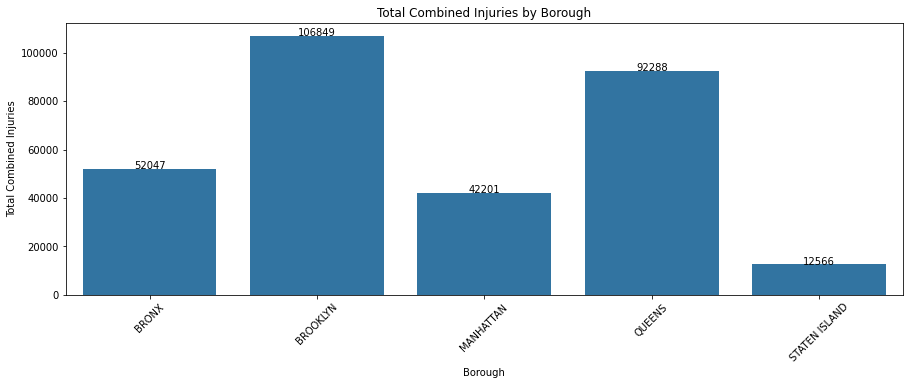

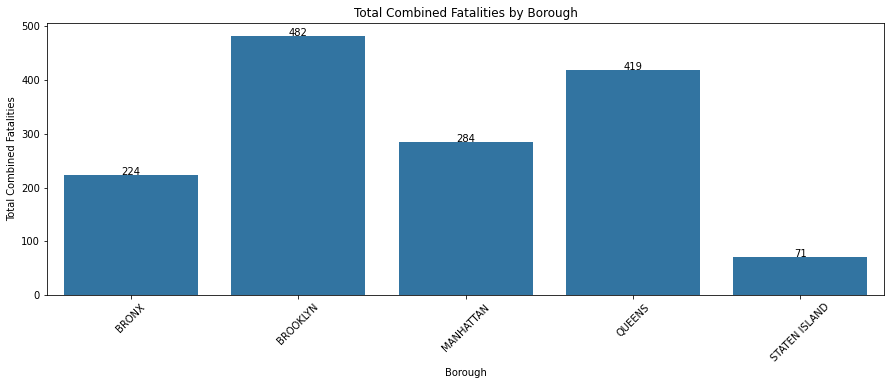

In [6]:
# Visualize Data

# Visualize Total Combined Injuries and Fatalities
plt.figure(figsize=(15, 5))
combined_plot_total = sns.barplot(x='BOROUGH', y='TOTAL_INJURED', data=borough_summary_total)

# Add numbers on top of bars for total combined injuries
for index, row in borough_summary_total.iterrows():
    combined_plot_total.text(index, row['TOTAL_INJURED'], int(row['TOTAL_INJURED']), color='black', ha="center")

plt.title('Total Combined Injuries by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Combined Injuries')
plt.xticks(rotation=45)
plt.show()

# Visualize Total Fatalities
plt.figure(figsize=(15, 5))
fatalities_plot_total = sns.barplot(x='BOROUGH', y='TOTAL_KILLED', data=borough_summary_total)

# Add numbers on top of bars for total fatalities
for index, row in borough_summary_total.iterrows():
    fatalities_plot_total.text(index, row['TOTAL_KILLED'], int(row['TOTAL_KILLED']), color='black', ha="center")

plt.title('Total Combined Fatalities by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Combined Fatalities')
plt.xticks(rotation=45)
plt.show()

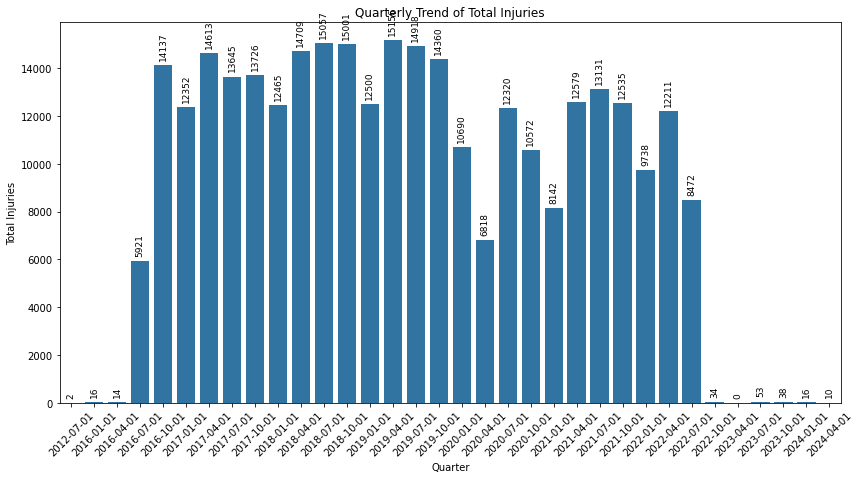

In [7]:
# Ensure CRASH DATE is a datetime object
injury_and_fatality['CRASH DATE'] = pd.to_datetime(injury_and_fatality['CRASH DATE'], errors='coerce')

# Extract the quarter for grouping
injury_and_fatality['QUARTER'] = injury_and_fatality['CRASH DATE'].dt.to_period('Q')

# Group by QUARTER and sum the total injuries and fatalities
quarterly_summary = injury_and_fatality.groupby('QUARTER').sum().reset_index()

# Convert QUARTER back to datetime for plotting
quarterly_summary['QUARTER'] = quarterly_summary['QUARTER'].dt.to_timestamp()

# Plot Bar Graph for Total Injuries
plt.figure(figsize=(14, 7))
injuries_plot = sns.barplot(x='QUARTER', y='TOTAL_INJURED', data=quarterly_summary)
plt.title('Quarterly Trend of Total Injuries')
plt.xlabel('Quarter')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)

# Add numbers on top of bars with better positioning
for p in injuries_plot.patches:
    injuries_plot.annotate(f'{int(p.get_height())}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='bottom', fontsize=9, color='black', 
                           xytext=(0, 5), textcoords='offset points', rotation=90)

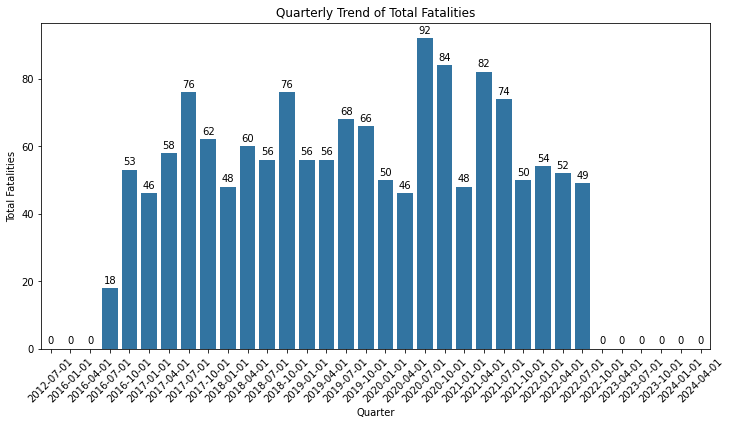

In [8]:
# Plot Bar Graph for Total Fatalities
plt.figure(figsize=(12, 6))
sns.barplot(x='QUARTER', y='TOTAL_KILLED', data=quarterly_summary)
plt.title('Quarterly Trend of Total Fatalities')
plt.xlabel('Quarter')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)

# Add numbers on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


In [9]:
# Extract the YEAR for grouping
injury_and_fatality['YEAR'] = injury_and_fatality['CRASH DATE'].dt.year

# Group by YEAR and sum the total injuries and fatalities
yearly_summary = injury_and_fatality.groupby('YEAR').sum().reset_index()


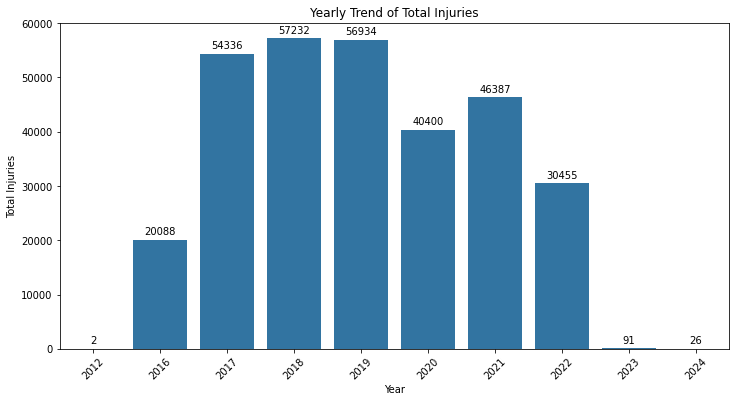

In [10]:
# Plot Bar Graph for Total Injuries
plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR', y='TOTAL_INJURED', data=yearly_summary)
plt.title('Yearly Trend of Total Injuries')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)

# Add numbers on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()



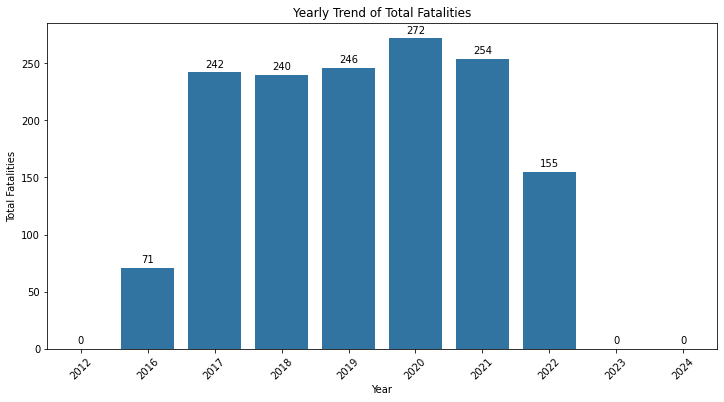

In [11]:
# Plot Bar Graph for Total Fatalities
plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR', y='TOTAL_KILLED', data=yearly_summary)
plt.title('Yearly Trend of Total Fatalities')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)

# Add numbers on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

In [12]:
# Injuries and Fatalities for each vehicle type

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

injury_fatality_df = pd.read_csv('./Injury_and_Fatality_Cleaned.csv')

injury_fatality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389226 entries, 0 to 389225
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   CRASH DATE                     389226 non-null  object
 1   BOROUGH                        389226 non-null  object
 2   ON STREET NAME                 389226 non-null  object
 3   NUMBER OF PERSONS INJURED      389226 non-null  int64 
 4   NUMBER OF PERSONS KILLED       389226 non-null  int64 
 5   NUMBER OF PEDESTRIANS INJURED  389226 non-null  int64 
 6   NUMBER OF PEDESTRIANS KILLED   389226 non-null  int64 
 7   NUMBER OF CYCLIST INJURED      389226 non-null  int64 
 8   NUMBER OF CYCLIST KILLED       389226 non-null  int64 
 9   NUMBER OF MOTORIST INJURED     389226 non-null  int64 
 10  NUMBER OF MOTORIST KILLED      389226 non-null  int64 
 11  TOTAL_INJURED                  389226 non-null  int64 
 12  TOTAL_KILLED                   389226 non-nu

In [13]:
# Calculate injuries and fatalities by each vehicle type
vehicle_types = ['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
                 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
                 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']

injury_fatality_data = {
    'Vehicle Type': ['Pedestrian', 'Cyclist', 'Motorist'],
    
    'Injured': [
        injury_fatality_df['NUMBER OF PEDESTRIANS INJURED'].sum(),
        injury_fatality_df['NUMBER OF CYCLIST INJURED'].sum(),
        injury_fatality_df['NUMBER OF MOTORIST INJURED'].sum()
    ],
    'Killed': [
        injury_fatality_df['NUMBER OF PEDESTRIANS KILLED'].sum(),
        injury_fatality_df['NUMBER OF CYCLIST KILLED'].sum(),
        injury_fatality_df['NUMBER OF MOTORIST KILLED'].sum()
    ]
}

vehicle_df = pd.DataFrame(injury_fatality_data)


In [14]:
# Print out the counts for each vehicle type
print(vehicle_df[['Vehicle Type', 'Injured', 'Killed']])

  Vehicle Type  Injured  Killed
0   Pedestrian    30289     393
1      Cyclist    15747      82
2     Motorist   105864     257


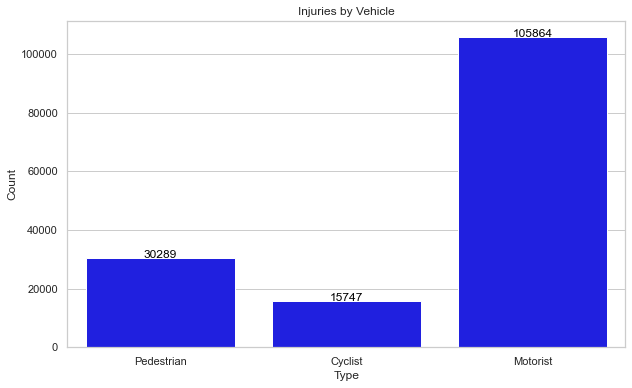

In [18]:
# Plot bar chart for Injuries by Vehicle Type

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

bar_plot = sns.barplot(
    x='Vehicle Type', y='Injured', data=vehicle_df, color='blue'
)

# Annotate counts on the bar chart
for index, row in vehicle_df.iterrows():
    bar_plot.text(row.name, row.Injured, row.Injured, color='black', ha="center")

plt.title('Injuries by Vehicle')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()


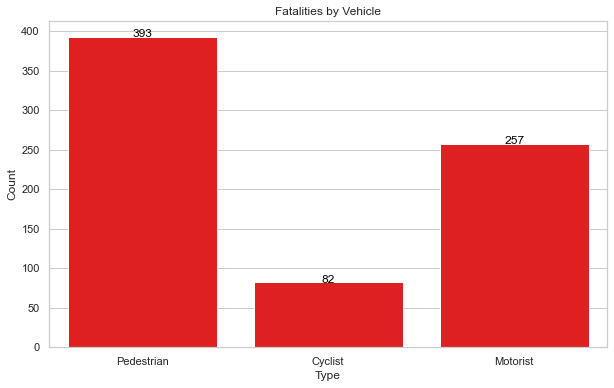

In [19]:
# Plot bar chart for Fatalities by Vehicle Type

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

bar_plot = sns.barplot(
    x='Vehicle Type', y='Killed', data=vehicle_df, color='red'
)

# Annotate counts on the bar chart
for index, row in vehicle_df.iterrows():
    bar_plot.text(row.name, row.Killed, row.Killed, color='black', ha="center")

plt.title('Fatalities by Vehicle')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()